<a href="https://colab.research.google.com/github/ThitiwatJtrsn/DWDM21/blob/main/MiniExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ข้อสอบ

จาก data ```flights.csv``` และ ```airports.csv``` ใน https://drive.google.com/drive/folders/1EFo1_uQgWkRiXjezL0T4YwteYrsqU5MV?usp=sharing
0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด
1. หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด
2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด
4. สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด
5. วันธรรมดา หรือวันเสาร์-อาทิตย์มีเครื่องบินขาเข้ามากกว่ากัน (วันจันทร์ = 1, วันอังคาร = 2, ...)

ให้นักศึกษาทำข้อสอบ 2 ข้อจากที่แสดงข้างบนโดยกรอกรหัสนักศึกษาลงใน function ```gen_exams()``` แล้ว run เพื่อให้ได้ข้อสอบที่นักศึกษาต้องทำ 2 ข้อ (ข้อละ 3 คะแนน)
และให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ (4 คะแนน)


In [1]:
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [5]:
flights = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/Mini Exam/flights.csv')
flights

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


In [6]:
airports = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/Mini Exam/airports.csv')
airports

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
...,...,...,...,...
360,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field
361,11097,Cody,WY,Yellowstone Regional
362,11865,Gillette,WY,Gillette Campbell County
363,12441,Jackson,WY,Jackson Hole


In [7]:
def gen_exams(ID):
    import math
    a = int(ID[-1])%6
    b = int(ID[-1])%3
    print(f'รหัสนักศึกษา {ID} ทำข้อ {a} และ {b if a != b else 5-b}')

ตัวอย่างการ run

In [11]:
gen_exams('623021047-5')

รหัสนักศึกษา 623021047-5 ทำข้อ 5 และ 2


##5. วันธรรมดา หรือวันเสาร์-อาทิตย์มีเครื่องบินขาเข้ามากกว่ากัน (วันจันทร์ = 1, วันอังคาร = 2, ...)

In [37]:
flights_airports = flights.merge(airports,how='left',left_on='รหัสสนามบินปลายทาง',right_on='รหัสสนามบิน') #รวมตาราง flights และ airports
flights_airports 

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,19,5,DL,11433,13303,-3,1,13303,Miami,FL,Miami International
1,19,5,DL,14869,12478,0,-8,12478,New York,NY,John F. Kennedy International
2,19,5,DL,14057,14869,-4,-15,14869,Salt Lake City,UT,Salt Lake City International
3,19,5,DL,15016,11433,28,24,11433,Detroit,MI,Detroit Metro Wayne County
4,19,5,DL,11193,12892,-6,-11,12892,Los Angeles,CA,Los Angeles International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,14869,Salt Lake City,UT,Salt Lake City International
2702214,19,6,DL,10397,13495,-2,-3,13495,New Orleans,LA,Louis Armstrong New Orleans International
2702215,19,6,DL,10140,10397,18,9,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702216,19,6,DL,10397,13244,10,7,13244,Memphis,TN,Memphis International


In [39]:
flights_airports.dropna() #ลบค่า missing

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,19,5,DL,11433,13303,-3,1,13303,Miami,FL,Miami International
1,19,5,DL,14869,12478,0,-8,12478,New York,NY,John F. Kennedy International
2,19,5,DL,14057,14869,-4,-15,14869,Salt Lake City,UT,Salt Lake City International
3,19,5,DL,15016,11433,28,24,11433,Detroit,MI,Detroit Metro Wayne County
4,19,5,DL,11193,12892,-6,-11,12892,Los Angeles,CA,Los Angeles International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,14869,Salt Lake City,UT,Salt Lake City International
2702214,19,6,DL,10397,13495,-2,-3,13495,New Orleans,LA,Louis Armstrong New Orleans International
2702215,19,6,DL,10140,10397,18,9,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702216,19,6,DL,10397,13244,10,7,13244,Memphis,TN,Memphis International


In [40]:
flights_airports[['รหัสสนามบินปลายทาง','วันในสัปดาห์']] #ดูรหัสสนามบินปลายทางและวันในสัปดาห์

,รหัสสนามบินปลายทาง,วันในสัปดาห์
0,13303,5
1,12478,5
2,14869,5
3,11433,5
4,12892,5
...,...,...
2702213,14869,6
2702214,13495,6
2702215,10397,6
2702216,13244,6


In [47]:
week = flights_airports.groupby('วันในสัปดาห์').count().sort_values(by=['รหัสสนามบินปลายทาง'],ascending=False) 
week.iloc[:,3:4] #ดูจำนวนของเครื่องบินขาเข้าในแต่ละวันในสัปดาห์

,รหัสสนามบินปลายทาง
วันในสัปดาห์,
1,407837
4,406563
3,403072
2,397594
5,396387
7,372228
6,318537


In [46]:
Weekday = week.iloc[:5,3:4].sum() 
Weekday #หาจำนวนของเครื่องบินขาเข้าในวันธรรมดา

รหัสสนามบินปลายทาง    2011453
dtype: int64

In [45]:
Weekend = week.iloc[5:7,3:4].sum() 
Weekend #หาจำนวนของเครื่องบินขาเข้าในวัน เสาร์-อาทิตย์

รหัสสนามบินปลายทาง    690765
dtype: int64

**ดังนั้นวันธรรมดาจะมีเครื่องบินขาเข้ามากกว่าวันเสาร์-อาทิตย์**

##2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์

In [31]:
import numpy as np
from matplotlib import pyplot as plt

In [32]:
data_flights = flights.groupby('วันในสัปดาห์')[['รหัสสนามบินต้นทาง']].count()
data_flights #จัดกลุ่ม วันในสัปดาห์ และ  รหัสสนามบินต้นทาง

,รหัสสนามบินต้นทาง
วันในสัปดาห์,
1,407837
2,397594
3,403072
4,406563
5,396387
6,318537
7,372228


In [33]:
data_flights.reset_index(inplace=True)
data_flights #ทำการเพิ่ม index เพื่อนำไปใช้งานต่อ

,วันในสัปดาห์,รหัสสนามบินต้นทาง
0,1,407837
1,2,397594
2,3,403072
3,4,406563
4,5,396387
5,6,318537
6,7,372228


No handles with labels found to put in legend.


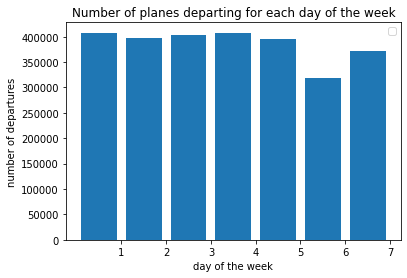

In [35]:
plt.bar(np.arange(len(data_flights.iloc[:,1])), data_flights.iloc[:,1])
plt.xlabel('day of the week')
plt.ylabel('number of departures')
plt.title('Number of planes departing for each day of the week')
plt.xticks(np.arange(len(data_flights.iloc[:,0]))+0.5, data_flights.iloc[:,0])
plt.legend();

##ข้อคิดเอง จำนวนเครื่องบินที่ลงรัฐ AK

In [22]:
airports[airports['รัฐ']=='AK']

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
5,10926,Cordova,AK,Merle K Mudhole Smith
6,14709,Deadhorse,AK,Deadhorse Airport
7,11336,Dillingham,AK,Dillingham Airport
8,11630,Fairbanks,AK,Fairbanks International
9,11997,Gustavus,AK,Gustavus Airport
